
# Table of Contents
### Region per location flag
### Low activity customer flag
### Subset for only normal activity customers
### Customer profile on age
### Customer profile on Income
### Customer profile on Dependents
### Bar chart - Orders per region
### Bar chart - Orders per type of customer

------ PAGE 2
### Importing Libraries and data frame
### Bar chart - Income groups with money spent
### Bar chart - Orders per income group
### Price range of products
### Bar chart - Orders per price range
### Bar chart - Price paid and Age
### Bar chart - Orders per price range
### Bar chart - Category of products sold

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\ranji\04_22_Instacart_Basket_Analysis'

In [3]:
#Importing data frame
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Task_4.9_1.pkl'))

In [8]:
#Creating Region per location
def region (row):

  if (row['STATE'] == 'Maine') or (row['STATE'] == 'New Hampshire') or (row['STATE'] == 'Vermont') or (row['STATE'] == 'Massachusetts') or (row['STATE'] == 'Rhode Island') or (row['STATE'] == 'Connecticut') or (row['STATE'] == 'New York') or (row['STATE'] == 'Pennsylvania')  or (row['STATE'] == 'New Jersey'):
    return 'Northeast'
  elif (row['STATE'] == 'Wisconsin') or (row['STATE'] == 'Michigan') or (row['STATE'] == 'Illinois') or (row['STATE'] == 'Indiana') or (row['STATE'] == 'Ohio') or (row['STATE'] == 'North Dakota') or (row['STATE'] == 'South Dakota') or (row['STATE'] == 'Nebraska') or (row['STATE'] == 'Kansas') or (row['STATE'] == 'Minnesota') or (row['STATE'] == 'Iowa') or (row['STATE'] == 'Missouri'): 
    return 'Midwest'
  elif (row['STATE'] == 'Delaware') or (row['STATE'] == 'Maryland') or (row['STATE'] == 'District of Columbia') or (row['STATE'] == 'Virginia') or (row['STATE'] == 'West Virginia') or (row['STATE'] == 'North Carolina') or (row['STATE'] == 'South Carolina') or (row['STATE'] == 'Georgia') or (row['STATE'] == 'Florida')or (row['STATE'] == 'Kentucky') or (row['STATE'] =='Tennessee') or (row['STATE'] == 'Mississippi') or (row['STATE'] =='Alabama') or (row['STATE'] == 'Oklahoma') or (row['STATE'] == 'Texas') or (row['STATE'] == 'Arkansas') or (row['STATE'] == 'Louisiana'):
    return 'South'
  elif (row['STATE'] == 'Idaho') or (row['STATE'] == 'Montana') or (row['STATE'] == 'Wyoming') or (row['STATE'] == 'Nevada') or (row['STATE'] == 'Utah') or (row['STATE'] == 'Colorado') or (row['STATE'] == 'Arizona') or (row['STATE'] == 'New Mexico')or (row['STATE'] == 'Alaska') or (row['STATE'] == 'Washington') or (row['STATE'] == 'Oregon') or (row['STATE'] == 'California') or (row['STATE'] == 'Hawaii'):
    return 'West'
  else: return 'Not enough data'
    
df_ords_prods_merge['Region'] = ords_prods_merge.apply(region, axis=1)

In [13]:
# Creating low activity customer flag
df_ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'low_activity_customer'] = 'Yes'
df_ords_prods_merge.loc[ords_prods_merge['max_order'] >= 5, 'low_activity_customer'] = 'No'


In [14]:
df_ords_prods_merge['low_activity_customer'].value_counts(dropna = False)

No     30992664
Yes     1441548
Name: low_activity_customer, dtype: int64

In [15]:
#Creating subset for only normal activity customers (orders greater than 5)
df_ords_prods_merge_normal_customers = ords_prods_merge[ords_prods_merge['low_activity_customer']=='No']

In [16]:
#Exporting subset with normal activity customer
df_ords_prods_merge_normal_customers.to_csv(os.path.join(path,'02 Data','Prepared Data','ords_prods_merge_normal_customers.csv'))

In [20]:
#Creating customer profile on age
Age_group = []

for value in ords_prods_merge_normal_customers['Age']:
    if (value >=18) and (value <=30):
        Age_group.append('Young Adults 18-30')
    elif (value >=31) and (value <=60):
        Age_group.append('Adults 31-60')
    elif (value >=61) and (value <=85):
        Age_group.append('Seniors 61-85')
    else:
        Age_group.append('Not classified')
        
df_ords_prods_merge_normal_customers['Age_group'] = Age_group

In [1]:
#Creating customer profile on Income
Income_group = []

for value in ords_prods_merge_normal_customers['income']:
    if (value >=10000) and (value <=40000):
        Income_group.append('Low_income')
    elif (value >40000) and (value <=100000):
        Income_group.append('Mid_income')
    elif value > 100000:
        Income_group.append('High_income')
    else:
        Income_group.append('Not classified')
        
df_ords_prods_merge_normal_customers['Income_group'] = Income_group

NameError: name 'ords_prods_merge_normal_customers' is not defined

In [30]:
#Creating customer profile on Dependents
Family_group = []

for value in ords_prods_merge_normal_customers['Children']:
    if value == 0 :
        Family_group.append('No Children')
    elif value > 0:
        Family_group.append('With Children')
    else:
        Family_group.append('Not classified')
        
df_ords_prods_merge_normal_customers['Family_group'] = Family_group

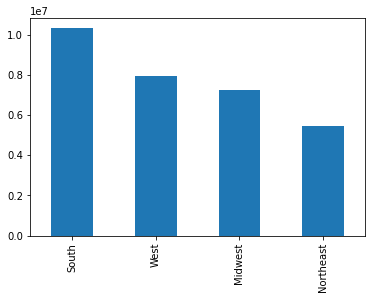

In [36]:
# Creating bar chart - Orders per region
bar_1 = df_ords_prods_merge_normal_customers['Region'].value_counts().plot.bar()

In [38]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'orders_per_region.png'))

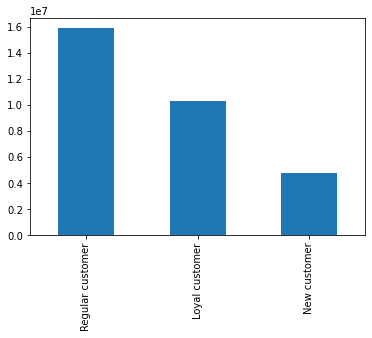

In [43]:
# Creating bar chart - Orders per type of customer
bar_2 = df_ords_prods_merge_normal_customers['loyalty_flag'].value_counts().plot.bar()

In [44]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'orders_per_type_customer.png'))

In [58]:
# Exporting df
df_ords_prods_merge_normal_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ord_prods_merge_normal_customers.pkl')) 

# Continuing in next script page